logistische Regression

In [14]:
# Load the Pandas libraries, matplotlib and numpy
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

# Read data 
data = pd.read_csv("Umfragedaten_v1_an.csv") 

# Preview the first 5 lines of the loaded data 
data.head()

,ID,GESCHL,GEBJAHR,BERUFSTAETIG,ARBEITSSTD,ARZTBES,RAUCH,GRO,GEW,SCHULABSCHLUSS,SCHULABSCHLUSS_V,SCHULABSCHLUSS_M,HOE_ABSCHLUSS,HOE_ABSCHLUSS_V,HOE_ABSCHLUSS_M,NETTO,ZUFR
0,1359,WEIBLICH,1967.0,NICHT ERWERBSTAETIG,NaN,1.0,JA,162.0,79.0,MITTLERE REIFE,MITTLERE REIFE,HOCHSCHULREIFE,LEHRE,"GEWERBL.,LANDW.LEHRE","MEISTER, TECHNIKER",475.0,10.0
1,2455,WEIBLICH,1964.0,HAUPTBERUFL.HALBTAGS,30.0,1.0,NEIN,165.0,59.0,MITTLERE REIFE,"VOLKS-,HAUPTSCHULE","VOLKS-,HAUPTSCHULE",LEHRE,"MEISTER, TECHNIKER",KAUFMAENNISCHE LEHRE,780.0,9.0
2,200,MAENNLICH,1980.0,NICHT ERWERBSTAETIG,NaN,3.0,NEIN,166.0,86.0,HOCHSCHULREIFE,HOCHSCHULREIFE,HOCHSCHULREIFE,HOCHSCHULABSCHLUSS,HOCHSCHULABSCHLUSS,HOCHSCHULABSCHLUSS,NaN,8.0
3,1280,MAENNLICH,1968.0,HAUPTBERUFL.GANZTAGS,50.0,0.0,NEIN,180.0,95.0,FACHHOCHSCHULREIFE,MITTLERE REIFE,MITTLERE REIFE,FACHHOCHSCHULABSCHL.,KAUFMAENNISCHE LEHRE,KAUFMAENNISCHE LEHRE,NaN,8.0
4,2384,WEIBLICH,1995.0,NICHT ERWERBSTAETIG,NaN,1.0,NEIN,161.0,46.0,NOCH SCHUELER,MITTLERE REIFE,"VOLKS-,HAUPTSCHULE",NOCH SCHUELER,"GEWERBL.,LANDW.LEHRE","GEWERBL.,LANDW.LEHRE",NaN,7.0


In [18]:
#load libraries for regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn


Data often have NaN or other bad values, which means data need to be cleaned first.

In [19]:
#need to dummy code variables first
x  = data['NETTO'].values.reshape(-1,1)
dummies = pd.get_dummies(data, columns=['RAUCH'])
y = dummies['RAUCH_JA'].values.reshape(-1,1)
dummies.head()

,ID,GESCHL,GEBJAHR,BERUFSTAETIG,ARBEITSSTD,ARZTBES,GRO,GEW,SCHULABSCHLUSS,SCHULABSCHLUSS_V,SCHULABSCHLUSS_M,HOE_ABSCHLUSS,HOE_ABSCHLUSS_V,HOE_ABSCHLUSS_M,NETTO,ZUFR,RAUCH_JA,RAUCH_NEIN
0,1359,WEIBLICH,1967.0,NICHT ERWERBSTAETIG,NaN,1.0,162.0,79.0,MITTLERE REIFE,MITTLERE REIFE,HOCHSCHULREIFE,LEHRE,"GEWERBL.,LANDW.LEHRE","MEISTER, TECHNIKER",475.0,10.0,True,False
1,2455,WEIBLICH,1964.0,HAUPTBERUFL.HALBTAGS,30.0,1.0,165.0,59.0,MITTLERE REIFE,"VOLKS-,HAUPTSCHULE","VOLKS-,HAUPTSCHULE",LEHRE,"MEISTER, TECHNIKER",KAUFMAENNISCHE LEHRE,780.0,9.0,False,True
2,200,MAENNLICH,1980.0,NICHT ERWERBSTAETIG,NaN,3.0,166.0,86.0,HOCHSCHULREIFE,HOCHSCHULREIFE,HOCHSCHULREIFE,HOCHSCHULABSCHLUSS,HOCHSCHULABSCHLUSS,HOCHSCHULABSCHLUSS,NaN,8.0,False,True
3,1280,MAENNLICH,1968.0,HAUPTBERUFL.GANZTAGS,50.0,0.0,180.0,95.0,FACHHOCHSCHULREIFE,MITTLERE REIFE,MITTLERE REIFE,FACHHOCHSCHULABSCHL.,KAUFMAENNISCHE LEHRE,KAUFMAENNISCHE LEHRE,NaN,8.0,False,True
4,2384,WEIBLICH,1995.0,NICHT ERWERBSTAETIG,NaN,1.0,161.0,46.0,NOCH SCHUELER,MITTLERE REIFE,"VOLKS-,HAUPTSCHULE",NOCH SCHUELER,"GEWERBL.,LANDW.LEHRE","GEWERBL.,LANDW.LEHRE",NaN,7.0,False,True


In [20]:
#not sure why pandas creates 2D arrays, but need 1D otherwise logistic regression would crash
x=x[:,0]
y=y[:,0]

#need to clean data, there seem to be some NaN in x
print(np.any(np.isnan(x)))
print(np.any(np.isnan(y)))


True
False


In [21]:
#print(np.where(np.isnan(x) == True))
print(x.ndim)
print(len(x))
index = np.where(~np.isnan(x))  #index of good data entries
#print(len(index))

xnew = x[index]  #only keep good entries
ynew = y[index]
print(xnew)

1
3471
[ 475.  780. 4000. ... 1500. 1300. 1100.]


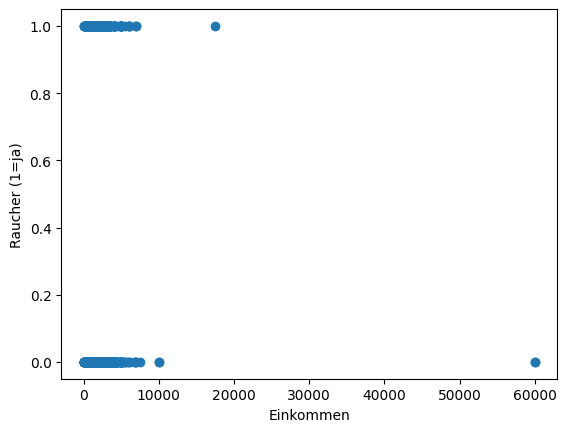

In [22]:
#show a scatter plot
plt.plot(xnew,ynew,'o')
plt.xlabel('Einkommen')
plt.ylabel('Raucher (1=ja)')
plt.show()

#1=raucher, 0=nichtraucher

Now we train the model by splitting it into a training set and then the test set is used to validate it.

In [23]:
#train the model

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(xnew.reshape(-1,1),ynew,test_size=0.05,random_state=0)


In [26]:
# logistic regression
logreg = LogisticRegression(penalty=None)
#penalty=none heisst keine Regularisierung. Als Default benuetzt Python Regularisierung. 
#Was genau Regularisierung ist, wird man in mlr lernen.

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)
y_pred2 = logreg.predict_proba(X_test)[:,1]

print(logreg.coef_, logreg.intercept_)



[[1.69613702e-05]] [-0.89682656]


In [27]:
#confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

#the matrix shows that 37 data points were predicted wrongly, so this fit was not good.


array([[99,  0],
       [37,  0]])

In [28]:
#to be sure which value are which
tn, fp, fn, tp = cnf_matrix.ravel()
print(tn,fp,fn,tp)
#so we have no true positives, but only true nagatives and false negatives.

99 0 37 0


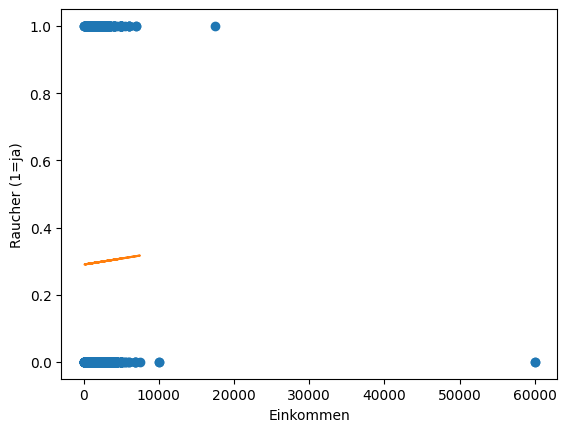

In [29]:
#plotting
#show a scatter plot
plt.plot(xnew,ynew,'o')
plt.plot(X_test,y_pred2)
plt.xlabel('Einkommen')
plt.ylabel('Raucher (1=ja)')
plt.show()

#this also shows a bad fit.

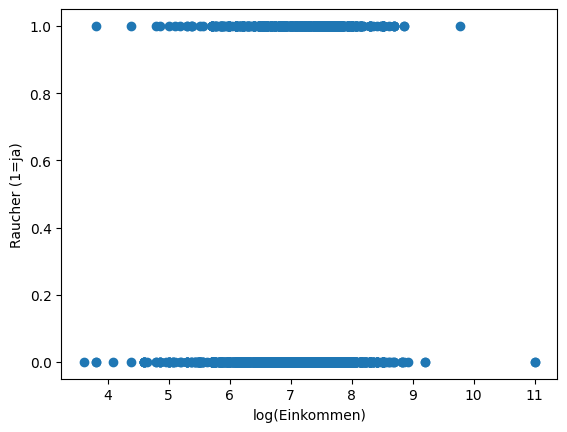

In [30]:
#let's try changing the model by taking the (natural) log of the income
plt.plot(np.log(xnew),ynew,'o')
plt.xlabel('log(Einkommen)')
plt.ylabel('Raucher (1=ja)')
plt.show()
#one can see that there is actually not a very clear separation between non-smokers (0) and smokers (1). 
#We fit it anyway.

In [34]:
xnew2 = np.log(xnew)
X_train,X_test,y_train,y_test = train_test_split(xnew2.reshape(-1,1),ynew,test_size=0.25, random_state=0)

# logistic regression 
logreg = LogisticRegression(penalty=None)

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)
y_pred2 = logreg.predict_proba(X_test)[:,1]

print(logreg.coef_, logreg.intercept_)



[[0.19024975]] [-2.23926409]


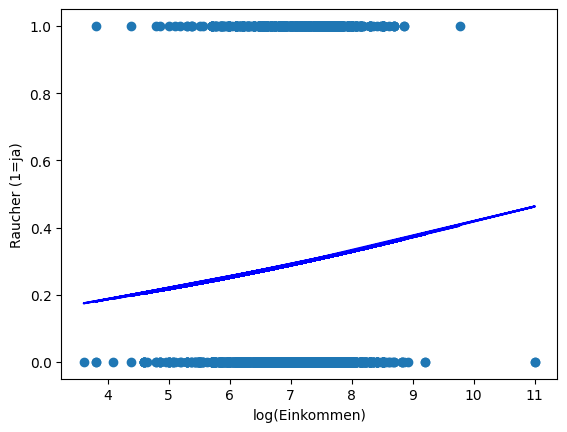

In [35]:
#create the model manually to verify the prediction of python works (yes, it's the same)
pi = np.exp(-2.24+.19*xnew2) / (1+np.exp(-2.24+.19*xnew2))

#plotting
#show a scatter plot
plt.plot(xnew2,ynew,'o')
plt.plot(X_test,y_pred2)
plt.plot(xnew2,pi,color='b')
plt.xlabel('log(Einkommen)')
plt.ylabel('Raucher (1=ja)')
plt.show()


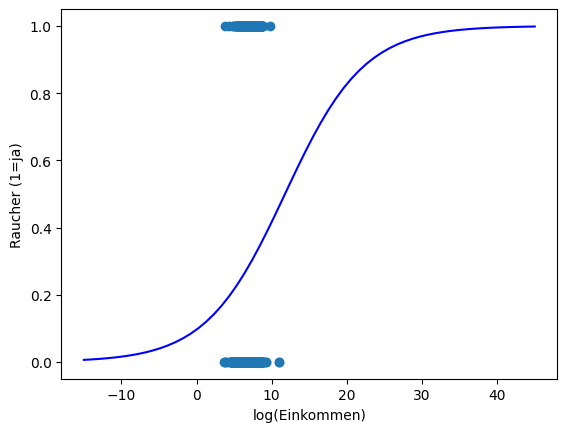

In [36]:
#plot a larger x-axis to see the full model
xlarge = np.linspace(-15,45,60).reshape((-1,1))
ylarge = logreg.predict_proba(xlarge)[:,1]

plt.plot(xnew2,ynew,'o')
plt.plot(xlarge,ylarge,color='b')
plt.xlabel('log(Einkommen)')
plt.ylabel('Raucher (1=ja)')
plt.show()

#yes, the model is a logit model, but the data are not clearly separated, which means it doesn't fit too well.
# We also see that the model would always predict a nonsmoker within our data range.

In [37]:
#wahrscheinlichkeit bei 2000 gehalt [%]
#predict() predicts a value, predict_proba predicts the probability
#I could not find a way to make it work with just 1 value, therefore I made
#an array and will ignore the result for 2001 below.
val = np.log(np.array([2000,2001]))

print(np.log(2000))
print((logreg.predict_proba(val.reshape(-1,1))*100.)[0])

#7.6 ist der x-Achsenwert  
#die zweite Zahl, also 31.1 ist die Wahrscheinlichkeit.


7.600902459542082
[68.85167908 31.14832092]


In [39]:
print(logreg.score)

<bound method ClassifierMixin.score of LogisticRegression(penalty=None)>
